# Lab 5a


## Activity 1
Using scipy's `integrate.cumtrapz` integrate one more time the area under a quadrant of a circle to determine $\pi$.


Populating the interactive namespace from numpy and matplotlib
-0.00041884584410700754


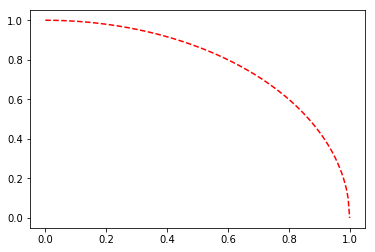

In [2]:
%pylab inline
import scipy.integrate as i
def func1(x):
    return sqrt(1-x**2)
x = linspace(0,1,200)
y=func1(x)
plot(x,y,'r--')

F=i.cumtrapz(y,x)
print(F[-1]*4.-pi)

## Exercise1: Waves

Download the [wave buoy data for Station 46204 - West Sea Otter (off West Coast of VI)](https://www.ndbc.noaa.gov/station_page.php?station=46204). Use the _Real time standard meteorological data_ option. Before you start have a quick look at the _description_ - what kind of data is this? 

* Download the data using a shell command. Read the data for the most recent 24 hours and store the first 10 columns into the variables `YY , MM, DD ,hh, mm, WDIR, WSPD, GST,  WVHT, DPD`.
* Create a time variable that starts at `t=0 hrs` with the earliest time and goes forward in hours. Plot the wind speed as a function of this time variable.
* Smooth the data by forming a centered moving average (CMA), where each value is replaced by the average of the value and the neighboring value on each side. Plot this smoothed data along with the original data. 
* Create a spline fit, using sympy's splrep/splev function. Adjust the smoothing parameter so that the spline fit looks similar to the CMA line. Overplot into the same figure.
* Make a plot of wave height agains wind speed using smoothed data.

In [3]:
%%bash 
wget https://www.ndbc.noaa.gov/data/realtime2/46204.txt

--2019-02-20 16:49:07--  https://www.ndbc.noaa.gov/data/realtime2/46204.txt
Resolving www.ndbc.noaa.gov (www.ndbc.noaa.gov)... 13.33.151.12, 13.33.151.191, 13.33.151.163, ...
Connecting to www.ndbc.noaa.gov (www.ndbc.noaa.gov)|13.33.151.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2538 (2.5K) [text/plain]
Saving to: '46204.txt.1'

     0K ..                                                    100%  293M=0s

2019-02-20 16:49:07 (293 MB/s) - '46204.txt.1' saved [2538/2538]



In [10]:
# loadtxt?

In [5]:
YYYY,MM,DD,hh,mm,WDir,WSpd,GST,WvHt,DRD=loadtxt("46204.txt",dtype='str',unpack=True,usecols=(0,1,2,3,4,5,6,7,8,9),skiprows=2)

In [42]:
print(hh[::-1])
t=list(range(len(hh)))
WSpd=WSpd[::-1].astype('float64')

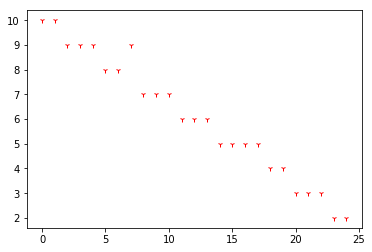

1

In [53]:
plot(t,WSpd,'r1')
show()
len(range(1,2))

In [56]:
def sma(dat,s,e):
    av=dat[s:e+1]/len(range(s,e))
    return av


In [157]:
import scipy.interpolate as interp

WSpd_CMA=[WSpd[0]]
for i,_ in enumerate(WSpd):
    if i>0 and i<len(WSpd)-1:
        WSpd_CMA.append((WSpd[i-1]+WSpd[i]+WSpd[i+1])/3)
# print(len(t),len(WSpd_CMA))

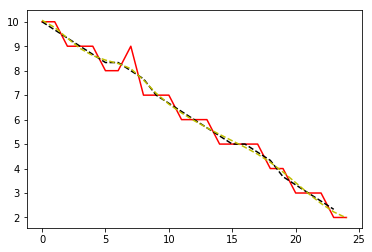

In [161]:
tck=interp.splrep(t,WSpd,s=3.0)
smoth=interp.splev(t,tck)
# plot(t,smoth)
plot(t,WSpd,'r-',WSpd_CMA,'k--',smoth,'y--')
show()